In [17]:
###Please download the dataset and place it in the same directory with the code###

#Import all required libraries
import tensorflow as tf
import zipfile as zf
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers, optimizers
%matplotlib inline

#Define some needed functions
def extract_file(file):
    file_read = zf.ZipFile(file, 'r')
    file_read.extractall()
    file_read.close()

def make_file(directory_name, parent_directory):
    path = os.path.join(parent_directory, directory_name)
    os.mkdir(path)
    
def moving_file(source_path, destination_path_train, destination_path_val, num_validation):
    sourcefiles = os.listdir(source_path)
    for file in sourcefiles:
        if file.endswith('.png'):
            shutil.move(os.path.join(source_path, file), os.path.join(destination_path_train, file))
    
    sourcefiles_val = os.listdir(destination_path_train)
    sourcefiles_val = sourcefiles_val[:num_validation]
    
    for element in sourcefiles_val :
        shutil.move(os.path.join(destination_path_train, element), os.path.join(destination_path_val, element))
        
def combine_train_file(source_path_1,source_path_2,source_path_3,destination_path):
    shutil.move(source_path_1, destination_path) 
    shutil.move(source_path_2, destination_path)
    shutil.move(source_path_3, destination_path)
    
def combine_val_file(source_path_1,source_path_2,source_path_3,destination_path):
    shutil.move(source_path_1, destination_path) 
    shutil.move(source_path_2, destination_path)
    shutil.move(source_path_3, destination_path)
    
def del_file(source_path, num_element):
    sourcefiles = os.listdir(source_path)
    sourcefiles = sourcefiles[:num_element]
    for file in sourcefiles:
        os.remove(os.path.join(source_path,file))
        
def build_model(Input_shape, Num_classes):
    model = models.Sequential()
    
    #1st block 
    model.add(layers.Conv2D(32, (3,3), padding='same', input_shape = Input_shape, activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    #2nd block 
    model.add(layers.Conv2D(64, (3,3), padding='same', activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    #3rd block 
    model.add(layers.Conv2D(128, (3,3), padding='same', activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    #Dense
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(Num_classes, activation='softmax'))
    
    return model

#Define Variables
Dataset            = 'rockpaperscissors.zip'
num_validation     = 20                        
num_delete_rock    = 14                        # in order to make number of data in rock,paper,scissors are equal
num_delete_scissors= 38
main_path          = 'rockpaperscissors'
train              = 'rockpaperscissors/train_data'
validation         = 'rockpaperscissors/val_data'
path_rock          = 'rockpaperscissors/rock'
path_paper         = 'rockpaperscissors/paper'
path_scissor       = 'rockpaperscissors/scissors'
path_rock_train    = 'rockpaperscissors/rock/train_rock'
path_rock_val      = 'rockpaperscissors/rock/val_rock'
path_paper_train   = 'rockpaperscissors/paper/train_paper'
path_paper_val     = 'rockpaperscissors/paper/val_paper'
path_scissors_train= 'rockpaperscissors/scissors/train_scissors'
path_scissors_val  = 'rockpaperscissors/scissors/val_scissors' 
Input_shape        = (150,100,3)
Num_classes        = 3


#Data Preprocessing
extract_file(Dataset)

make_file('train_rock', path_rock)
make_file('val_rock', path_rock)
make_file('train_paper', path_paper)
make_file('val_paper', path_paper)
make_file('train_scissors', path_scissor)
make_file('val_scissors', path_scissor)
make_file('train_data', main_path)
make_file('val_data', main_path)

moving_file(path_rock, path_rock_train, path_rock_val, num_validation)
moving_file(path_paper, path_paper_train, path_paper_val, num_validation)
moving_file(path_scissor, path_scissors_train, path_scissors_val, num_validation)
       
del_file(path_rock_train, num_delete_rock)
del_file(path_scissors_train, num_delete_scissors)

combine_train_file(path_rock_train, path_paper_train, path_scissors_train, train)
combine_val_file(path_rock_val, path_paper_val, path_scissors_val, validation)

#Prepare Data for ImageDataGenerator
train_set      = os.path.join(main_path, 'train_data')
validation_set = os.path.join(main_path, 'val_data')

train_rock_dir     = os.path.join(train_set, 'train_rock') 
train_paper_dir    = os.path.join(train_set, 'train_paper')
train_scissors_dir = os.path.join(train_set, 'train_scissors')

val_rock_dir       = os.path.join(validation_set, 'val_rock')
val_paper_dir      = os.path.join(validation_set, 'val_paper')
val_scissors       = os.path.join(validation_set, 'val_scissors')

#Image Augmentation
train_datagen = ImageDataGenerator(
                    rescale           = 1./255,
                    rotation_range    = 20,
                    horizontal_flip   = True,
                    shear_range       = 0.2,
                    width_shift_range = 0.2,
                    height_shift_range= 0.2
                    )

val_datagen   = ImageDataGenerator(
                    rescale           = 1./255,
                    rotation_range    = 20,
                    horizontal_flip   = True,
                    shear_range       = 0.2,
                    width_shift_range = 0.2,
                    height_shift_range= 0.2
                    )

train_generator= train_datagen.flow_from_directory(
                    train_set,
                    target_size = (150, 100),
                    batch_size  = 4,
                    class_mode  = 'categorical'
                    )

val_generator  = val_datagen.flow_from_directory(
                    validation_set,
                    target_size = (150, 100),
                    batch_size  = 4,
                    class_mode  = 'categorical'
                    )                

#Train the Network Model

model = build_model(Input_shape, Num_classes)
model.summary()

model.compile(loss='categorical_crossentropy', 
            optimizer='Adam', 
            metrics=['accuracy'])


Found 2076 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 100, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 50, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 25, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 12, 128)       0         
______________________________________

In [18]:
model.fit(
            train_generator,
            epochs=50,
            validation_data = val_generator,
            )

Train for 519 steps, validate for 15 steps
Epoch 1/50
519/519 [==============================] - 17s 33ms/step - loss: 1.0553 - accuracy: 0.4297 - val_loss: 0.9057 - val_accuracy: 0.5167
Epoch 2/50
519/519 [==============================] - 16s 32ms/step - loss: 0.5683 - accuracy: 0.7616 - val_loss: 0.5118 - val_accuracy: 0.8333
Epoch 3/50
519/519 [==============================] - 17s 32ms/step - loss: 0.2596 - accuracy: 0.9041 - val_loss: 0.2186 - val_accuracy: 0.9167
Epoch 4/50
519/519 [==============================] - 17s 32ms/step - loss: 0.1866 - accuracy: 0.9403 - val_loss: 0.1669 - val_accuracy: 0.9500
Epoch 5/50
519/519 [==============================] - 16s 31ms/step - loss: 0.1424 - accuracy: 0.9552 - val_loss: 0.1147 - val_accuracy: 0.9500
Epoch 6/50
519/519 [==============================] - 16s 31ms/step - loss: 0.1357 - accuracy: 0.9581 - val_loss: 0.1680 - val_accuracy: 0.9333
Epoch 7/50
519/519 [==============================] - 16s 31ms/step - loss: 0.1159 - accuracy

It is paper


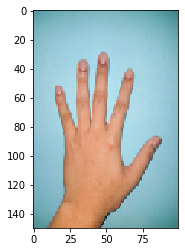

In [20]:
#Test The Trained Network
path = 'rockpaperscissors/paper.png'
img = tf.keras.preprocessing.image.load_img(path, target_size=(150,100))
imgplot = plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
    
images = np.vstack([x])
classes = model.predict(images, batch_size=25)

if classes[0,0] == 1:
    print('It is paper')
elif classes[0,1] == 1:
    print('It is rock')
elif classes[0,2] == 1:
    print('It is Scissors')
else:
    print('Uncategorized')

https://github.com/khikmafarisy